## Supplementary Figure - All model evalulation

- One panel figure showing all model performace

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

# Load variables important for plotting (e.g., themes, phenotypes, etc.)
source("themes.r")

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”


In [2]:
# Set output file
output_fig <- file.path("figures", "supplementary", "all_model_f1_score_performance_barchart.png")

In [3]:
# Load data
results_dir <- file.path(
    "..", "3.evaluate_model", "evaluations", "F1_scores"
)
results_file <- file.path(results_dir, "compiled_F1_scores.tsv")

f1_score_df <- readr::read_tsv(
    results_file,
    col_types = readr::cols(
        .default = "d",
        "Phenotypic_Class" = "c",
        "data_split" = "c",
        "shuffled" = "c",
        "feature_type" = "c",
        "balance_type" = "c"
    )
) %>%
    dplyr::select(!`...1`) %>%
    dplyr::mutate(feature_type_with_data_split = paste0(feature_type, data_split)) %>%
    dplyr::mutate(feature_type_with_balance_type = paste0(feature_type, balance_type)) %>%
    dplyr::filter(
        shuffled == "False",
        data_split == "test"
    )

f1_score_df$Phenotypic_Class <-
    dplyr::recode(f1_score_df$Phenotypic_Class, Weighted = "OverallPerformance")

# Reverse order of predicted label for plotting
front_level <- "OverallPerformance"
remaining_levels <- setdiff(unique(f1_score_df$Phenotypic_Class), front_level)
new_order <- c(rev(remaining_levels), front_level)

f1_score_df$Phenotypic_Class <-
    factor(f1_score_df$Phenotypic_Class, levels = rev(new_order))

f1_score_df$feature_type_with_balance_type <-
    factor(
        f1_score_df$feature_type_with_balance_type,
        levels = c(
            "CPbalanced",
            "CPunbalanced",
            "DPbalanced",
            "DPunbalanced",
            "CP_and_DPbalanced",
            "CP_and_DPunbalanced",
            "CP_zernike_onlybalanced",
            "CP_zernike_onlyunbalanced",
            "CP_areashape_onlybalanced",
            "CP_areashape_onlyunbalanced"
        )
    )

feature_space_labels <- c(
    "CPbalanced" = "CellProfiler",
    "CPunbalanced" = "CellProfiler",
    "DPbalanced" = "DeepProfiler",
    "DPunbalanced" = "DeepProfiler",
    "CP_and_DPbalanced" = "CP and DP",
    "CP_and_DPunbalanced" = "CP and DP",
    "CP_zernike_onlybalanced" = "CP Zernike",
    "CP_zernike_onlyunbalanced" = "CP Zernike",
    "CP_areashape_onlybalanced" = "CP AreaShape",
    "CP_areashape_onlyunbalanced" = "CP AreaShape"
)

f1_score_df$feature_type_with_balance_type <-
    dplyr::recode_factor(f1_score_df$feature_type_with_balance_type, !!!feature_space_labels)

print(dim(f1_score_df))
head(f1_score_df)

New names:
• `` -> `...1`


[1] 160   8


Phenotypic_Class,F1_Score,data_split,shuffled,feature_type,balance_type,feature_type_with_data_split,feature_type_with_balance_type
<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
ADCCM,0.7878788,test,False,CP,balanced,CPtest,CellProfiler
Anaphase,0.8000000,test,False,CP,balanced,CPtest,CellProfiler
Apoptosis,0.7560976,test,False,CP,balanced,CPtest,CellProfiler
Binuclear,0.6666667,test,False,CP,balanced,CPtest,CellProfiler
Elongated,0.9411765,test,False,CP,balanced,CPtest,CellProfiler
Grape,0.5161290,test,False,CP,balanced,CPtest,CellProfiler


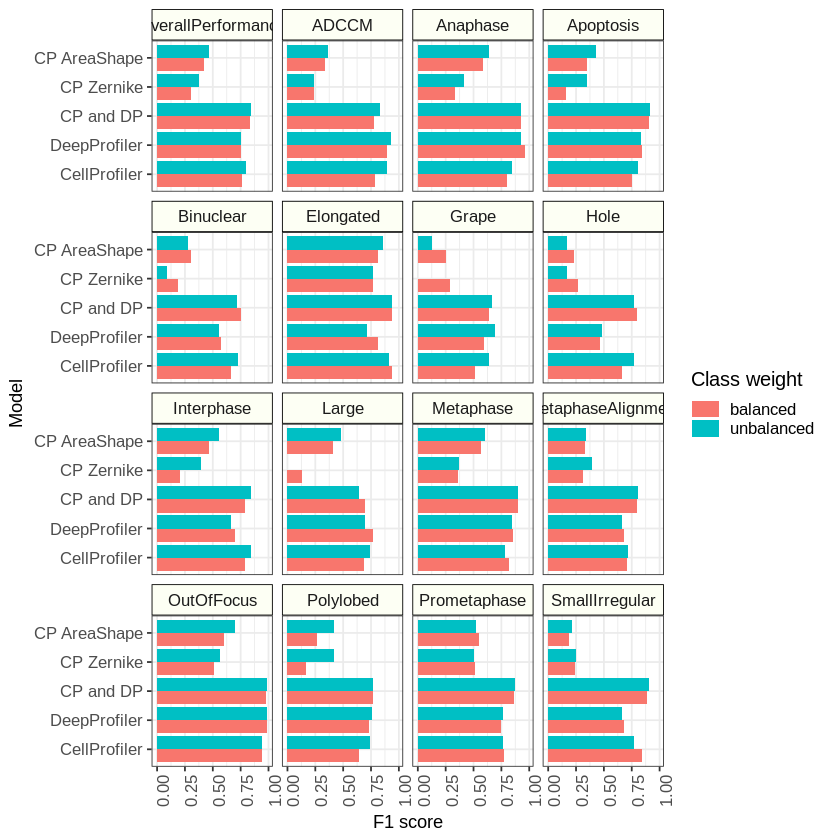

In [4]:
focus_bar_gg <- (
    ggplot(f1_score_df, aes(x = feature_type_with_balance_type, y = F1_Score))
    + geom_bar(aes(fill = balance_type), stat = "identity", position = "dodge")
    + facet_wrap("~Phenotypic_Class", nrow = 4)
    + phenotypic_ggplot_theme
    + scale_fill_discrete("Class weight")
    + theme(
        axis.text.x = element_text(angle = 90)
    )
    + labs(
        x = "Model",
        y = "F1 score"
    )
    + coord_flip()
)

focus_bar_gg

In [5]:
ggsave(output_fig, dpi = 500, height = 8, width = 9.5)